In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import STL  
import matplotlib
import matplotlib.pyplot as plt
# 指定中文字体以及允许负号显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
policy_dir = '../data/policy_selected/'
data_dir = '../data/new_found/新能源汽车相关核心专利数据/'
# 加载专利数据（文档6）
load_dir_year = data_dir + '智慧芽专利数据库-申请量随时间如何变化-20250320.xlsx'
patent_data = pd.read_excel(load_dir_year)
patent_data['申请年'] = pd.to_datetime(patent_data['申请年 / 状态'], format='%Y')
patent_data.set_index('申请年', inplace=True)
patent_ts = patent_data['申请']  # 直接使用年度数据，无需resample


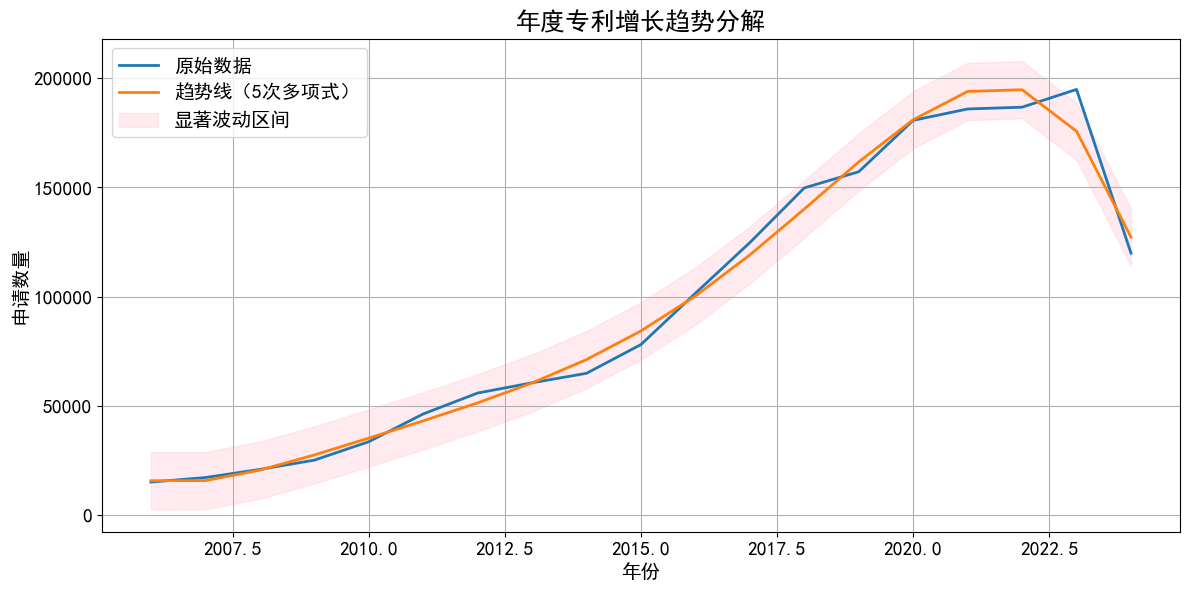

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib

# 设置中文字体（以 SimHei 为例，可换为你系统支持的中文字体）
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 拟合5次多项式趋势
X = np.arange(len(patent_ts)).reshape(-1, 1)
y = patent_ts.values

# 用多项式拟合（5次）
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
trend = model.predict(X_poly)

# 计算残差（异常波动）
residual = y - trend

# 可视化分解结果
plt.figure(figsize=(12, 6))
plt.plot(patent_ts.index.year, patent_ts, label='原始数据', linewidth=2)
plt.plot(patent_ts.index.year, trend, label='趋势线（5次多项式）', linewidth=2)
plt.fill_between(patent_ts.index.year, trend + 2*np.std(residual),
                 trend - 2*np.std(residual), color='pink', alpha=0.3,
                 label='显著波动区间')

plt.title('年度专利增长趋势分解', fontsize=18)
plt.xlabel('年份', fontsize=14)
plt.ylabel('申请数量', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


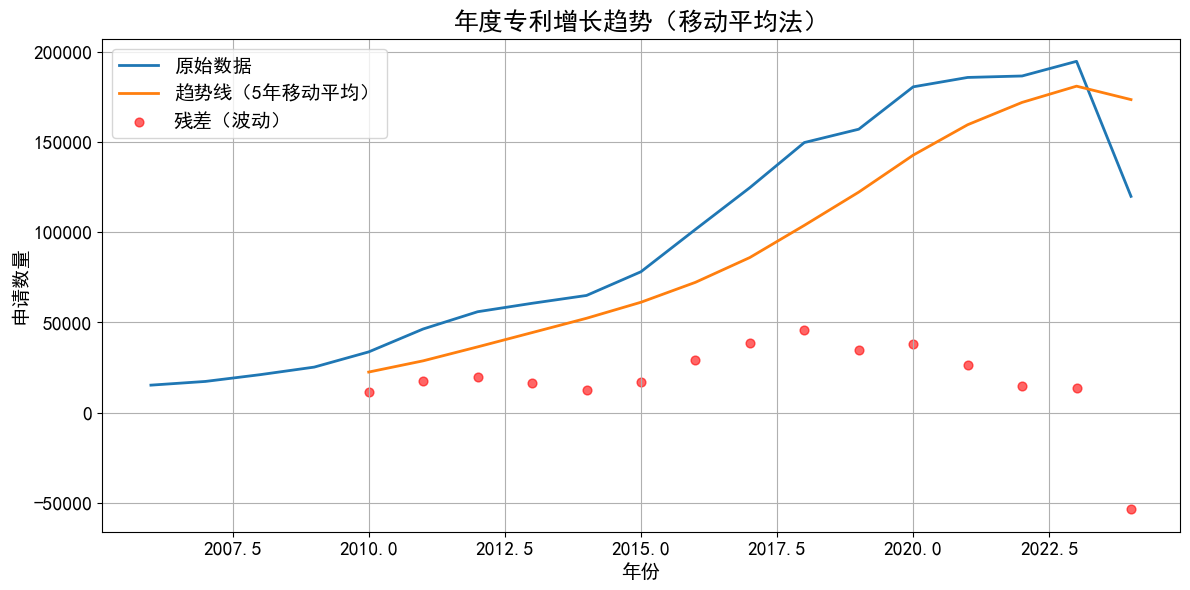

In [13]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 例如：黑体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决负号乱码

# 计算5年移动平均趋势
trend = patent_ts.rolling(window=5).mean()

# 计算残差
residual = patent_ts - trend

# 可视化分解结果
plt.figure(figsize=(12, 6))
plt.plot(patent_ts.index.year, patent_ts, label='原始数据', linewidth=2)
plt.plot(patent_ts.index.year, trend, label='趋势线（5年移动平均）', linewidth=2)
plt.scatter(patent_ts.index.year, residual, color='red', alpha=0.6,
            label='残差（波动）', s=40)

plt.title('年度专利增长趋势（移动平均法）', fontsize=18)
plt.xlabel('年份', fontsize=14)
plt.ylabel('申请数量', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


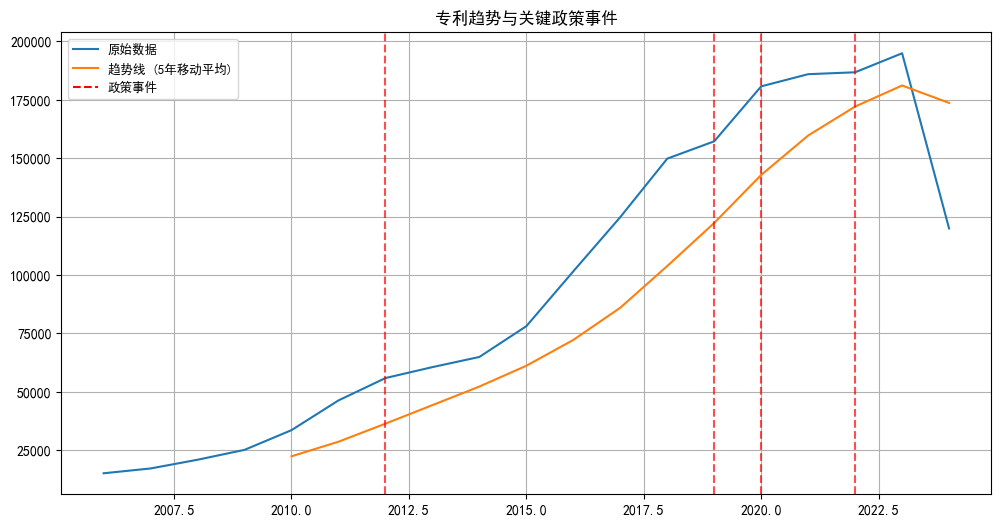

In [5]:
from matplotlib.lines import Line2D
policy_events = {
    2019: '交通强国建设纲要',
    2012: '节能与新能源汽车产业发展规划',
    2020: '新能源汽车产业发展规划（2021－2035年）',
    2020: '新能源汽车生产企业及产品准入管理规定',  # 注意：字典键重复，会被覆盖
    2022: '“十四五”现代能源体系规划'
}

# 绘制趋势与数据
plt.figure(figsize=(12, 6))
plt.plot(patent_ts.index.year, patent_ts, label='原始数据')
plt.plot(patent_ts.index.year, trend, label='趋势线 (5年移动平均)')

# 标记政策事件（不设置标签）
for year in policy_events:
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.7)

# 获取自动生成的图例项（原始数据、趋势线）
handles, labels = plt.gca().get_legend_handles_labels()

# 手动创建政策事件的合并图例项
event_text = '\n'.join([f"{year}: {event}" for year, event in policy_events.items()])
policy_legend = Line2D([], [], color='red', linestyle='--', label=f'政策事件:\n{event_text}')

# 将政策事件图例项追加到列表
handles.append(policy_legend)
labels.append('政策事件') 

# 显示合并后的图例
plt.legend(handles=handles, labels=labels, loc='upper left', fontsize=9)
plt.title('专利趋势与关键政策事件')
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
import numpy as np

# 替换为实际数据加载代码，这里假定加载的是数值数据
# 示例：从 CSV 文件加载数据
# patent_ts = pd.read_csv('path/to/data.csv', squeeze=True)  
patent_ts = pd.Series([...])  # 你的数据加载代码

# 确保数据为数值类型
patent_ts = pd.to_numeric(patent_ts, errors='coerce')

# 修复索引为实际年份（示例：2000～2000+len(patent_ts)-1）
patent_ts.index = pd.period_range(start='2000', periods=len(patent_ts), freq='Y').year

# 计算趋势和残差（确保索引对齐）
trend = patent_ts.rolling(window=5, center=True).mean()
residual = patent_ts - trend
residual = residual.dropna()  # 去除 NaN，但保留有效年份的索引

# 计算阈值（2σ）并识别显著异常年份
threshold = 2 * np.std(residual)
significant_years = residual.index[np.abs(residual) > threshold]

# 输出具有显著波动的年份及对应数据
print("Significant Fluctuation Years (2σ Threshold):")
for year in significant_years:
    print(f"{year}: {patent_ts.loc[year]} applications")

# 关联政策事件（支持同一年多个事件）
policy_events = [
    (2019, '交通强国建设纲要'),
    (2012, '节能与新能源汽车产业发展规划'),
    (2020, '新能源汽车产业发展规划（2021－2035年）'),
    (2020, '新能源汽车生产企业及产品准入管理规定'),
    (2022, '“十四五”现代能源体系规划')
]

# 将政策事件转换为字典：年份 -> [事件列表,...]
policy_dict = {}
for year, event in policy_events:
    policy_dict.setdefault(year, []).append(event)

print("\nPolicy Events in Significant Years:")
for year in significant_years:
    if year in policy_dict:
        events = ', '.join(policy_dict[year])
        print(f"{year}: {events}")
    else:
        print(f"{year}: No recorded policy event")

Significant Fluctuation Years (2σ Threshold):

Policy Events in Significant Years:


专利数据与政策强度指数和关系的分析

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings('ignore')

# 指定中文字体以及允许负号显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
policy_dir = '../data/policy_selected/'
data_dir = '../data/new_found/新能源汽车相关核心专利数据/'
# 加载专利数据（文档6）
load_dir_year = data_dir + '智慧芽专利数据库-申请量随时间如何变化-20250320.xlsx'
patent_data = pd.read_excel(load_dir_year)
patent_ts = patent_data.set_index('申请年 / 状态')['申请']
patent_ts.index = pd.to_datetime(patent_ts.index.astype(str), format='%Y')

# 2. 加载政策文本（假设txt文件按年份命名，如2012.txt）
import os
policy_dir = '../data/texts/documents/'  
policy_files = [f for f in os.listdir(policy_dir) if f.endswith('.txt')]
policy_texts = {}
for file in policy_files:
    try:
        # 提取文件名前面的年份部分
        year = int(file.split('_')[0])
        with open(os.path.join(policy_dir, file), 'r', encoding='utf-8') as f:
            policy_texts[year] = f.read()
    except Exception as e:
        print(f"跳过文件 {file}：{e}")

In [8]:
import re
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# ----- 加载自定义分词词典 -----#
custom_dict_file = '../data/texts/policy_terms.txt'
jieba.load_userdict(custom_dict_file)

# ----- 加载停用词文件 -----#
stopwords_file = '../data/texts/stopwords/hit_stopwords.txt'
with open(stopwords_file, 'r', encoding='utf-8') as f:
    stopwords = [line.strip() for line in f if line.strip()]

def jieba_tokenizer(text):
    # 预先清理文本
    cleaned_text = text.strip().replace('\n', ' ')
    # 使用 jieba 分词
    tokens = jieba.lcut(cleaned_text)
    # 过滤掉空白、纯数字或不含中文的词
    tokens = [token for token in tokens if token.strip() and re.search(r'[\u4e00-\u9fff]', token)]
    return tokens

# 1.1.1 合并政策文本并提取技术关键词，使用双字词（1-gram和2-gram）提高匹配率
all_texts = list(policy_texts.values())
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words=stopwords,
    tokenizer=jieba_tokenizer,
    analyzer='word',
    ngram_range=(1,2)
)
tfidf_matrix = vectorizer.fit_transform(all_texts)
feature_names = vectorizer.get_feature_names_out()

# 1.1.2 匹配专利技术分类（文档2）
load_dir_number = data_dir + '技术分类专利量统计.xlsx'
tech_categories = pd.read_excel(load_dir_number)['技术主题分类'].tolist()
tech_keywords = [kw for kw in feature_names if kw in tech_categories]

# 1.1.3 计算政策技术关联度，并进行平滑处理避免零值
tech_scores = []
smoothing = 1e-6  # 平滑常数
for i in range(len(all_texts)):
    score = 0
    found = False  # 标记是否匹配到关键词
    for kw in tech_keywords:
        if kw in vectorizer.vocabulary_:
            # 对匹配到的关键词 TF-IDF 值加上平滑常数
            score += tfidf_matrix[i, vectorizer.vocabulary_[kw]] + smoothing
            found = True
    if not found:
        score = smoothing  # 如果没有匹配到任何关键词，赋予一个小值
    tech_scores.append(score)
    print(f"技术关联度 {list(policy_texts.keys())[i]}: {score:.6f}")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\12914\AppData\Local\Temp\jieba.cache
Loading model cost 0.566 seconds.
Prefix dict has been built successfully.


技术关联度 2012: 0.510811
技术关联度 2014: 0.402027
技术关联度 2015: 0.000008
技术关联度 2017: 0.193330
技术关联度 2019: 0.018984
技术关联度 2020: 0.307086
技术关联度 2021: 0.000008
技术关联度 2022: 0.593296
技术关联度 2023: 0.007640
技术关联度 2024: 0.373777
技术关联度 2025: 0.220056


In [9]:
import pandas as pd

# 指定 CSV 文件路径
csv_path = '../data/policy_selected/sentiment_scores.csv'
sentiment_df = pd.read_csv(csv_path)
print(sentiment_df.head())

# 假设第一列（文件名）格式为 "2022_文件名"，提取年份并生成新列 "year"
first_col = sentiment_df.columns[0]
sentiment_df['year'] = sentiment_df[first_col].apply(lambda x: int(x.split('_')[0]))

# 对每个年份，取情感得分均值（或其它聚合方法）
sentiment_group = sentiment_df.groupby('year', as_index=False)['sentiment'].mean()
print("情感得分按年份聚合：\n", sentiment_group)

# 构建 policy_index，假设 policy_texts 和 tech_scores 已经存在
policy_index = pd.DataFrame({
    'year': sorted(policy_texts.keys()),
    'tech_score': tech_scores
})

# 合并情感得分，如果某年份没有情感数据则跳过（删除对应记录）
policy_index = policy_index.merge(sentiment_group, on='year', how='left')
policy_index = policy_index.dropna(subset=['sentiment'])
policy_index['intensity'] = policy_index['tech_score'] * policy_index['sentiment']

print(policy_index)
# 指定 CSV 文件路径
csv_path = '../data/policy_selected/sentiment_scores.csv'
sentiment_df = pd.read_csv(csv_path)
print(sentiment_df.head())

# 假设第一列（文件名）格式为 "2022_文件名"，提取年份并生成新列 "year"
first_col = sentiment_df.columns[0]
sentiment_df['year'] = sentiment_df[first_col].apply(lambda x: int(x.split('_')[0]))

# 对每个年份，取情感得分均值（或其它聚合方法）
sentiment_group = sentiment_df.groupby('year', as_index=False)['sentiment'].mean()
print("情感得分按年份聚合：\n", sentiment_group)

# 构建 policy_index，假设 policy_texts 和 tech_scores 已经存在
policy_index = pd.DataFrame({
    'year': sorted(policy_texts.keys()),
    'tech_score': tech_scores
})

# 合并情感得分，如果某年份没有情感数据则跳过（删除对应记录）
policy_index = policy_index.merge(sentiment_group, on='year', how='left')
policy_index = policy_index.dropna(subset=['sentiment'])
policy_index['intensity'] = policy_index['tech_score'] * policy_index['sentiment']

print(policy_index)

                                       file_name  sentiment
0  2012_国务院关于印发节能与新能源汽车产业发展规划(2012―2020年)的通知.txt   0.500000
1              2014_国务院办公厅关于加快新能源汽车推广应用的指导意见.txt   0.927654
2           2015_国务院办公厅关于加快电动汽车充电基础设施建设的指导意见.txt   0.980000
3             2016_国务院五项措施支持新能源汽车 加快充电基础设施建设.txt   0.999999
4                 2016_国务院多措并举力推新能源汽车产业迈向中高端.txt   0.999990
情感得分按年份聚合：
     year  sentiment
0   2012   0.500000
1   2014   0.927654
2   2015   0.980000
3   2016   0.999996
4   2018   0.890000
5   2019   0.928394
6   2020   0.909198
7   2021   0.975000
8   2022   0.972260
9   2023   0.945369
10  2024   0.899205
   year  tech_score  sentiment  intensity
0  2012    0.510811   0.500000   0.255405
1  2014    0.402027   0.927654   0.372942
2  2015    0.000008   0.980000   0.000008
4  2019    0.018984   0.928394   0.017624
5  2020    0.307086   0.909198   0.279202
6  2021    0.000008   0.975000   0.000008
7  2022    0.593296   0.972260   0.576837
8  2023    0.007640   0.945369   0.007223
9  2024   

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.api import OLS, add_constant
import matplotlib.pyplot as plt

# 显著性水平设置为 0.10 （10%）
sig_level = 0.10

# ------------------------------
# Step 1: 读取情感得分数据并提取年份
csv_path = '../data/policy_selected/sentiment_scores.csv'
sentiment_df = pd.read_csv(csv_path)
print("原始情感数据:")
print(sentiment_df.head())

# 如果存在原始得分列（如 raw_sentiment），先归一化到 0.1~0.5 区间
if 'raw_sentiment' in sentiment_df.columns:
    min_val = sentiment_df['raw_sentiment'].min()
    max_val = sentiment_df['raw_sentiment'].max()
    sentiment_df['sentiment'] = 0.1 + (sentiment_df['raw_sentiment'] - min_val) / (max_val - min_val) * (0.5 - 0.1)
    print("归一化后的情感得分:")
    print(sentiment_df[['raw_sentiment', 'sentiment']].head())
else:
    print("未检测到 'raw_sentiment' 列，将直接使用 'sentiment' 值。")

# 假设文件名格式为 "2022_文件名"，提取年份
first_col = sentiment_df.columns[0]
sentiment_df['year'] = sentiment_df[first_col].apply(lambda x: int(str(x).split('_')[0]))

# ------------------------------
# Step 2: 按年份聚合情感得分（采用中位数聚合，更稳健）
sentiment_group = sentiment_df.groupby('year', as_index=False)['sentiment'].median()
print("情感得分按年份（中位数）聚合:")
print(sentiment_group)

# ------------------------------
# Step 3: 构造政策指数 DataFrame
# 这里假设 policy_texts 与 tech_scores 已存在，示例数据如下（请替换为实际数据）
policy_texts = {2012:"...", 2014:"...", 2019:"...", 2020:"...", 2021:"...", 2022:"...", 2023:"...", 2024:"..."}
tech_scores = {2012:0.510811, 2014:0.402027, 2019:0.018984, 2020:0.307086, 2021:0.000008, 2022:0.593296, 2023:0.007640, 2024:0.373777}

policy_index = pd.DataFrame({
    'year': sorted(policy_texts.keys()),
    'tech_score': [tech_scores[yr] for yr in sorted(policy_texts.keys())]
})
print("初始政策指数:")
print(policy_index)

# 合并情感得分（如果某年份无情感数据，则删除该记录）
policy_index = policy_index.merge(sentiment_group, on='year', how='left')
policy_index = policy_index.dropna(subset=['sentiment'])
# 计算 intensity = tech_score * sentiment
policy_index['intensity'] = policy_index['tech_score'] * policy_index['sentiment']
print("最终的 policy_index:")
print(policy_index)

# 将 policy_index 作为 VAR 分析数据
combined_data = policy_index.copy()
print("combined_data:")
print(combined_data[['year', 'tech_score', 'sentiment']])
print("数据形状:", combined_data.shape)
print(combined_data.describe())

# ------------------------------
# Step 4: 对 sentiment 进行差分并检验平稳性
combined_data_diff = combined_data.copy()
# 一阶差分
combined_data_diff['sentiment_diff'] = combined_data_diff['sentiment'].diff()
combined_data_diff = combined_data_diff.dropna()

def adf_test(series, title=''):
    print(f'ADF检验: {title}')
    result = adfuller(series, autolag='AIC')
    print(f'ADF统计量: {result[0]}')
    print(f'p-value: {result[1]}')
    print()

adf_test(combined_data_diff['sentiment_diff'], 'Sentiment Diff')

# 二阶差分
combined_data_diff['sentiment_diff2'] = combined_data_diff['sentiment_diff'].diff()
combined_data_diff = combined_data_diff.dropna()
adf_test(combined_data_diff['sentiment_diff2'], 'Sentiment Diff2')

# ------------------------------
# Step 5: 选择平稳性更好的差分变量
adf_result_diff2 = adfuller(combined_data_diff['sentiment_diff2'], autolag='AIC')
# 这里采用新设定的显著性水平 sig_level 来决定选择哪一阶差分
selected_diff = 'sentiment_diff2' if adf_result_diff2[1] < sig_level else 'sentiment_diff'
print(f"最终选择的差分变量为: {selected_diff}")

# ------------------------------
# Step 6: 滞后回归分析（OLS）
# 构造滞后变量
model_data = combined_data_diff[['tech_score', selected_diff]].copy()
model_data['tech_score_lag'] = model_data['tech_score'].shift(1)
model_data[f'{selected_diff}_lag'] = model_data[selected_diff].shift(1)
model_data = model_data.dropna()

# 构造回归模型
X = model_data[['tech_score_lag', f'{selected_diff}_lag']]
X = add_constant(X)  # 添加截距项
y = model_data['tech_score']

# 使用 OLS 进行回归
ols_model = OLS(y, X).fit()
print("OLS 回归结果:")
print(ols_model.summary())

# 检查情感差分滞后项的显著性
p_value_sentiment = ols_model.pvalues[f'{selected_diff}_lag']
if p_value_sentiment < sig_level:
    print(f"情感差分滞后项显著（p={p_value_sentiment:.4f} < {sig_level}），表明情感对技术得分有显著影响。")
else:
    print(f"情感差分滞后项不显著（p={p_value_sentiment:.4f} >= {sig_level}），表明情感对技术得分无显著影响。")

原始情感数据:
                                       file_name  sentiment
0  2012_国务院关于印发节能与新能源汽车产业发展规划(2012―2020年)的通知.txt   0.500000
1              2014_国务院办公厅关于加快新能源汽车推广应用的指导意见.txt   0.927654
2           2015_国务院办公厅关于加快电动汽车充电基础设施建设的指导意见.txt   0.980000
3             2016_国务院五项措施支持新能源汽车 加快充电基础设施建设.txt   0.999999
4                 2016_国务院多措并举力推新能源汽车产业迈向中高端.txt   0.999990
未检测到 'raw_sentiment' 列，将直接使用 'sentiment' 值。
情感得分按年份（中位数）聚合:
    year  sentiment
0   2012   0.500000
1   2014   0.927654
2   2015   0.980000
3   2016   0.999998
4   2018   0.890000
5   2019   0.928394
6   2020   0.903395
7   2021   0.975000
8   2022   0.960000
9   2023   0.950001
10  2024   0.856789
初始政策指数:
   year  tech_score
0  2012    0.510811
1  2014    0.402027
2  2019    0.018984
3  2020    0.307086
4  2021    0.000008
5  2022    0.593296
6  2023    0.007640
7  2024    0.373777
最终的 policy_index:
   year  tech_score  sentiment  intensity
0  2012    0.510811   0.500000   0.255406
1  2014    0.402027   0.927654   0.372942
